In [7]:
import seaborn as sns
import gspread
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
%matplotlib inline

In [27]:
scopes = ["https://www.googleapis.com/auth/drive",
          "https://www.googleapis.com/auth/spreadsheets"]

goog_creds = ServiceAccountCredentials.from_json_keyfile_name(
    'airy.json', scopes=scopes)

gc = gspread.authorize(goog_creds)
sheet = gc.open('Air_Quality')
work_sheet = sheet.worksheet('sheet')

In [28]:
values = work_sheet.get_all_values()

In [29]:
dat = pd.DataFrame.from_records(data=values[2:], columns=['Time Stamp', 'Dust Density'])
dat['Time Stamp'] = dat['Time Stamp'].apply(lambda x: pd.to_datetime(x, unit='ms'))

In [30]:
dat.tail()

,Time Stamp,Dust Density
190,2019-04-18 15:30:05.355,0.1
191,2019-04-18 15:30:07.866,0.06
192,2019-04-18 15:30:10.378,0.05
193,2019-04-18 15:30:12.893,0.04
194,2019-04-18 15:30:15.404,0.05


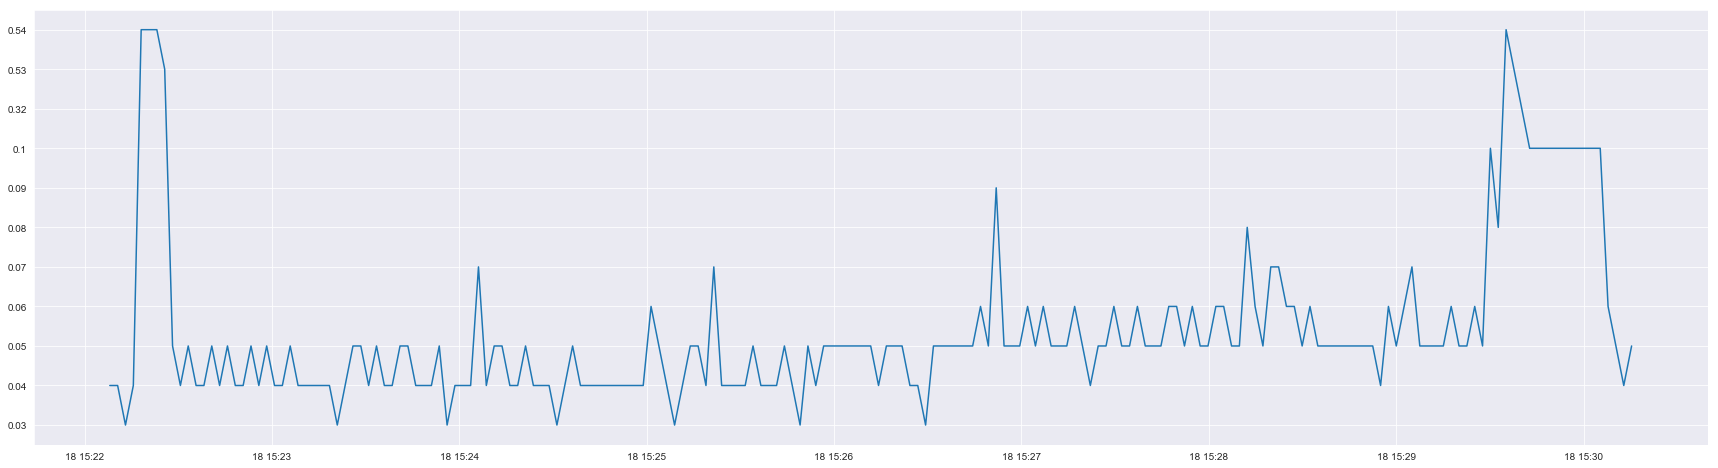

In [31]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(dat['Time Stamp'], dat['Dust Density'], )